In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import torch
print(torch.cuda.is_available())

True


In [2]:
np.random.seed(42)
dataset_path = Path("datasets/two_new_new")
test_path = Path("images/two_wheeler_test")
dataset_path, test_path

(PosixPath('datasets/two_new_new'), PosixPath('images/two_wheeler_test'))

In [3]:
src_without_transform = (ImageList.from_folder(dataset_path)
                        .split_by_rand_pct(0.2)         #How to split in train/valid? -> use the folders
                        .label_from_folder()            #How to label? -> depending on the folder of the filenames
                        )

In [4]:
vehicle_transforms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2)

In [5]:
"""
data = (src_without_transform
        .transform(vehicle_transforms,size=128)
        .databunch(bs=16))
"""
data = (src_without_transform
        .transform(vehicle_transforms,size=256)
        .databunch(bs=16))
"""
data = (src_without_transform
        .transform(vehicle_transforms,size=512)
        .databunch(bs=4))"""

'\ndata = (src_without_transform\n        .transform(vehicle_transforms,size=512)\n        .databunch(bs=4))'

In [7]:
data.classes

['Aprilia SR 150',
 'Hero Dare',
 'Hero Maestro Edge',
 'Honda Activa 5G',
 'Honda CLIQ',
 'Honda Dio',
 'Okinawa Praise',
 'TVS Jupiter',
 'TVS NTORQ 125',
 'TVS Scooty Pep Plus',
 'TVS XL 100',
 'Vespa SXL 150',
 'Yamaha Fascino',
 'Yamaha Ray ZR']

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy])

In [9]:
learn.load("stage128")

Learner(data=ImageDataBunch;

Train: LabelList (1076 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100
Path: datasets/two_new_new;

Valid: LabelList (269 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Honda Activa 5G,Okinawa Praise,Honda CLIQ,Okinawa Praise,Okinawa Praise
Path: datasets/two_new_new;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (

In [10]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


(None, None)

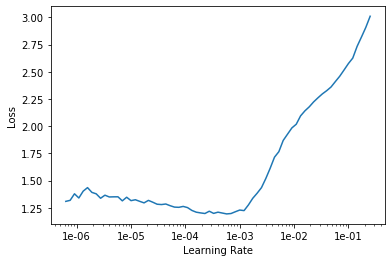

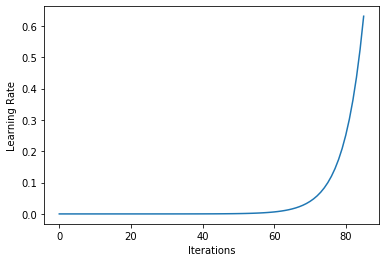

In [11]:
learn.lr_find()
learn.recorder.plot(), learn.recorder.plot_lr()

In [12]:
learn.fit_one_cycle(5,max_lr=slice(7e-6,8e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.199163,1.030719,0.304833,0.695167,03:34
1,0.991647,0.868550,0.249071,0.750929,03:28
2,0.742124,0.649994,0.189591,0.810409,03:27
3,0.535798,0.641086,0.189591,0.810409,03:27
4,0.443394,0.613359,0.174721,0.825279,03:26


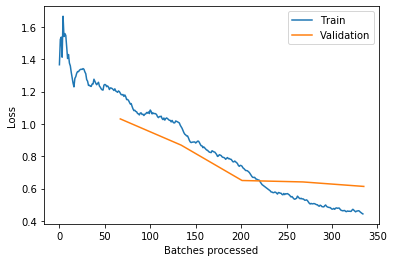

In [13]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


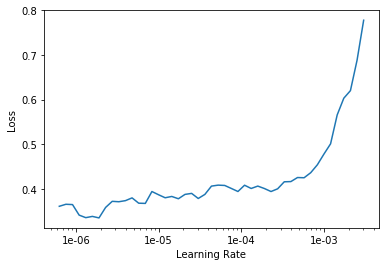

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.save("stage256")

In [16]:
learn.load("stage256")

Learner(data=ImageDataBunch;

Train: LabelList (1076 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100
Path: datasets/two_new_new;

Valid: LabelList (269 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Honda Activa 5G,Okinawa Praise,Honda CLIQ,Okinawa Praise,Okinawa Praise
Path: datasets/two_new_new;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (

In [25]:
learn.fit_one_cycle(4,max_lr=slice(5e-6,5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.739495,0.834941,0.237918,0.762082,02:33
1,0.684223,0.814903,0.237918,0.762082,02:41
2,0.692453,0.801739,0.219331,0.780669,02:32
3,0.646473,0.845658,0.226766,0.773234,02:29


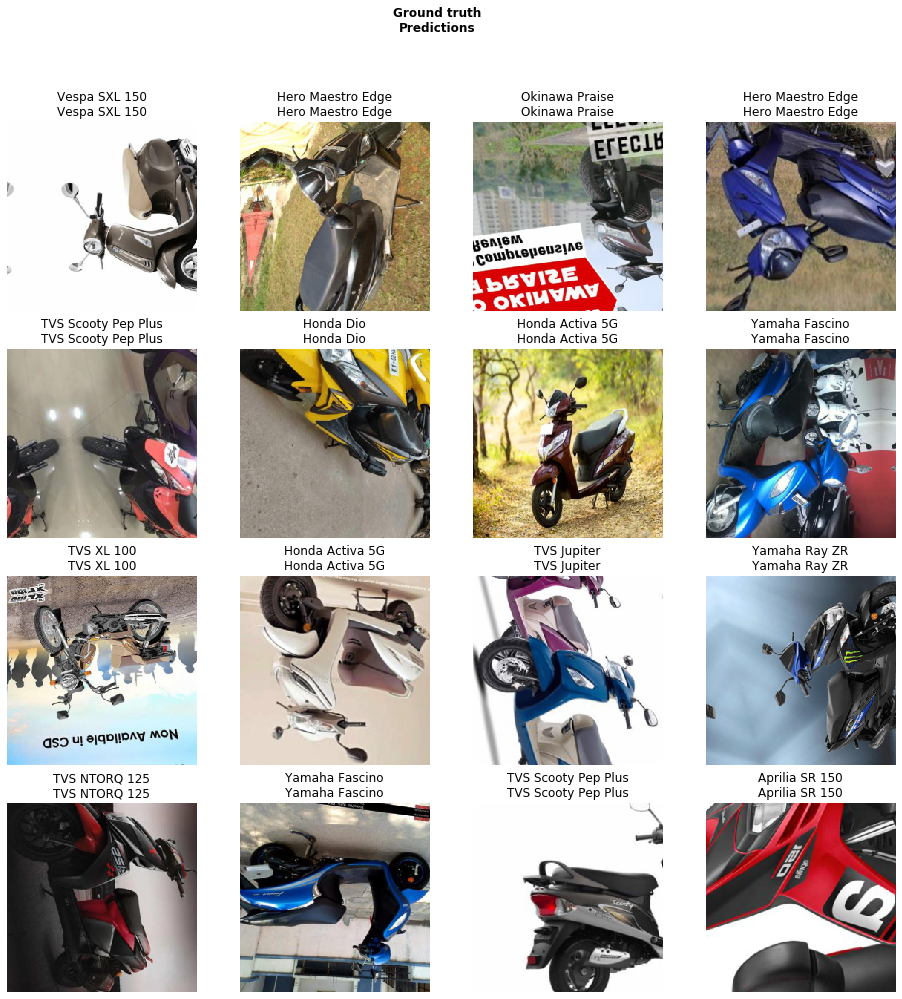

In [26]:
learn.show_results(ds_type=DatasetType.Train)

In [27]:
learn.save("stage256")

In [14]:
learn.load("stage512_proper")

Learner(data=ImageDataBunch;

Train: LabelList (1235 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100
Path: datasets/two_new;

Valid: LabelList (308 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
TVS NTORQ 125,Hero Pleasure,TVS Scooty Pep Plus,Hero Dare,Aprilia SR 150
Path: datasets/two_new;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


(None, None)

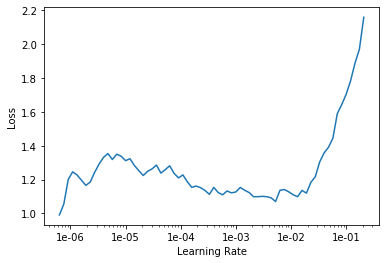

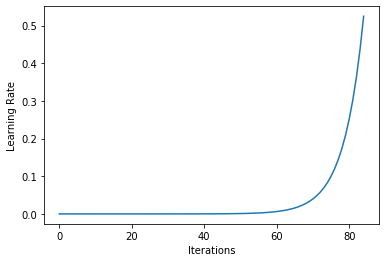

In [15]:
learn.lr_find()
learn.recorder.plot(), learn.recorder.plot_lr()

In [16]:
learn.fit_one_cycle(4,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.209280,1.041166,0.262987,0.737013,11:09
1,1.074052,0.985445,0.262987,0.737013,11:05
2,1.171916,0.996484,0.279221,0.720779,11:22
3,1.125400,0.938165,0.246753,0.753247,11:10


512 model without back side pics accuracy 75.3247

In [17]:
learn.save("stage512_proper")

In [17]:
learn.export()

In [18]:
model = load_learner(dataset_path)

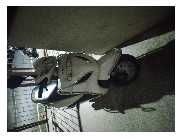

In [26]:
img = open_image(test_path/'test1.jpg')
img.show()


In [27]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class, pred_idx, outputs

(Category TVS Jupiter,
 tensor(7),
 tensor([1.1856e-03, 3.5109e-05, 1.4933e-03, 6.2248e-02, 1.4848e-03, 2.7218e-03,
         1.1815e-05, 9.0471e-01, 1.0576e-03, 1.2843e-02, 3.8889e-05, 5.8126e-03,
         1.9578e-03, 4.4013e-03]))